In [1]:
#Importing all the necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#To enable plotting in the environment
%matplotlib inline

In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Reading the Data**

In [3]:
#Read the Dataset
df = pd.read_json('/content/gdrive/MyDrive/Datasets/News Headlines Dataset/Sarcasm Detection/Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


**Exploring Data**

In [4]:
#Size of the dataset  
print('Size:', df.shape)

Size: (26709, 3)


In [5]:
#Information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


**No Missing Values in any of the columns.**

In [6]:
#Number of unique classes in the target column 'is_sarcastic'
df['is_sarcastic'].unique()

array([0, 1])

In [7]:
#Number of examples per each class - Class Balance Check
df.groupby('is_sarcastic')['headline'].count()

is_sarcastic
0    14985
1    11724
Name: headline, dtype: int64

* There isn't much of an imbalance between the classes 0 and 1. 
* Class 0 has a higher representation than Class 1.

In [8]:
#Few examples of the 'Headlines'
num = np.random.randint(0, df.shape[0])
print('Headline:', df.loc[num, 'headline'])
print('Label:', df.loc[num, 'is_sarcastic'])

Headline: dad's marine corps training evident during christmas-present opening
Label: 1


In [9]:
#Median number of words per example
num_words = []
for s in df['headline']:
  num_words.append(len(s.split()))

print('Median number of words per example:', np.median(num_words))

Median number of words per example: 10.0


In [10]:
#Length of the examples
length = []
for s in df['headline']:
  length.append(len(s))

print('Length of each example:', length)

Length of each example: [78, 84, 79, 84, 64, 27, 46, 67, 50, 59, 63, 59, 70, 64, 51, 64, 88, 50, 58, 20, 50, 111, 66, 42, 71, 37, 58, 22, 57, 40, 55, 51, 65, 59, 65, 34, 33, 86, 67, 71, 64, 82, 56, 53, 41, 41, 92, 71, 38, 33, 28, 52, 65, 69, 88, 67, 72, 49, 66, 68, 28, 28, 41, 88, 69, 60, 71, 81, 43, 42, 39, 50, 39, 54, 80, 63, 58, 64, 32, 57, 59, 59, 68, 85, 61, 64, 104, 53, 87, 76, 29, 113, 79, 42, 62, 49, 73, 54, 65, 44, 51, 67, 47, 55, 28, 68, 37, 64, 41, 63, 69, 77, 43, 118, 40, 71, 57, 107, 85, 69, 52, 22, 56, 60, 58, 65, 76, 58, 36, 82, 60, 57, 33, 58, 42, 58, 61, 63, 76, 61, 61, 59, 54, 47, 67, 52, 57, 48, 62, 73, 43, 67, 32, 77, 51, 62, 50, 66, 49, 88, 47, 43, 54, 80, 85, 84, 57, 91, 60, 48, 48, 64, 75, 40, 61, 36, 70, 25, 59, 50, 81, 97, 63, 47, 57, 48, 90, 61, 67, 66, 65, 72, 43, 40, 56, 90, 40, 43, 63, 96, 46, 96, 66, 66, 48, 91, 43, 29, 68, 49, 62, 40, 80, 85, 28, 123, 51, 58, 88, 61, 76, 57, 76, 62, 21, 55, 57, 56, 72, 24, 60, 57, 75, 60, 45, 51, 83, 60, 48, 60, 35, 94, 6

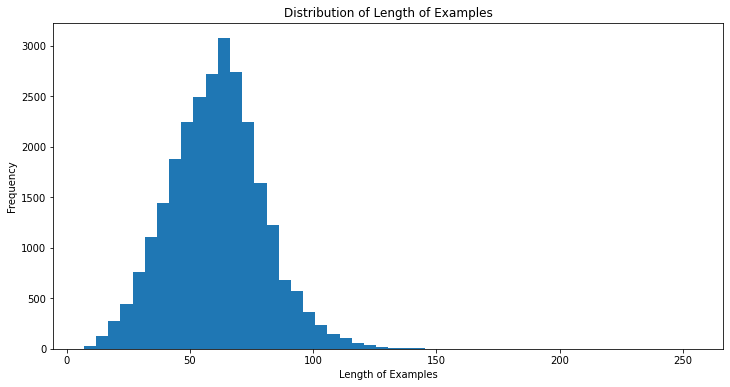

In [11]:
#Distribution of Length of each example
plt.figure(figsize=(12,6))
plt.title('Distribution of Length of Examples')
plt.hist(length, 50)
plt.xlabel('Length of Examples')
plt.ylabel('Frequency')
plt.show()


**Creating Training Set & Test Set**

In [12]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['is_sarcastic'], test_size=0.20, random_state=1)
print('Training Set Size:', X_train.shape[0])
print('Test Set Size:', X_test.shape[0])

Training Set Size: 21367
Test Set Size: 5342


**Creating Validation Set**

In [13]:
#Training Set and Validation Set Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)
print('Training Set Size:', X_train.shape[0])
print('Validation Set Size:', X_val.shape[0])

Training Set Size: 17093
Validation Set Size: 4274


**Tokenization**

In [14]:
#Tokenization
t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(X_train.to_list())

In [15]:
#Vocabulary
t.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'man': 12,
 'trump': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'this': 19,
 'out': 20,
 'after': 21,
 'be': 22,
 'up': 23,
 'how': 24,
 'that': 25,
 'it': 26,
 'as': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'all': 33,
 'just': 34,
 'who': 35,
 'has': 36,
 'will': 37,
 'he': 38,
 'more': 39,
 'report': 40,
 'one': 41,
 'area': 42,
 'into': 43,
 'why': 44,
 'have': 45,
 'donald': 46,
 'year': 47,
 'over': 48,
 'can': 49,
 'u': 50,
 'day': 51,
 'first': 52,
 'woman': 53,
 'says': 54,
 's': 55,
 'her': 56,
 'time': 57,
 'like': 58,
 "trump's": 59,
 'get': 60,
 'off': 61,
 'obama': 62,
 'old': 63,
 'no': 64,
 'people': 65,
 'life': 66,
 'an': 67,
 'house': 68,
 'women': 69,
 'now': 70,
 "'": 71,
 'still': 72,
 'make': 73,
 'white': 74,
 'was': 75,
 'than': 76,
 'world': 77,
 'my': 78,
 '5': 79,
 'could': 80,
 'their': 81,
 'i

In [16]:
#Number of unique words in the Vocabulary
print('Number of Unique Words:', len(t.word_index))

Number of Unique Words: 23791


Let us consider Vocabulary Size = 10,000

In [17]:
#Rebuilding the Tokenizer with a Vocabulary Size of 10000
t1 = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token=32)
t1.fit_on_texts(X_train.to_list())

In [18]:
#Vocabulary
t1.word_index

{32: 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'man': 13,
 'trump': 14,
 'from': 15,
 'at': 16,
 'about': 17,
 'you': 18,
 'by': 19,
 'this': 20,
 'out': 21,
 'after': 22,
 'be': 23,
 'up': 24,
 'how': 25,
 'that': 26,
 'it': 27,
 'as': 28,
 'not': 29,
 'are': 30,
 'your': 31,
 'his': 32,
 'what': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'he': 39,
 'more': 40,
 'report': 41,
 'one': 42,
 'area': 43,
 'into': 44,
 'why': 45,
 'have': 46,
 'donald': 47,
 'year': 48,
 'over': 49,
 'can': 50,
 'u': 51,
 'day': 52,
 'first': 53,
 'woman': 54,
 'says': 55,
 's': 56,
 'her': 57,
 'time': 58,
 'like': 59,
 "trump's": 60,
 'get': 61,
 'off': 62,
 'obama': 63,
 'old': 64,
 'no': 65,
 'people': 66,
 'life': 67,
 'an': 68,
 'house': 69,
 'women': 70,
 'now': 71,
 "'": 72,
 'still': 73,
 'make': 74,
 'white': 75,
 'was': 76,
 'than': 77,
 'world': 78,
 'my': 79,
 '5': 80,
 'could': 81,
 'their'

In [19]:
#Converting Text Sequences to Word-Index Vectorization
X_train = t1.texts_to_sequences(X_train.to_list())
X_val = t1.texts_to_sequences(X_val.to_list())
X_test = t1.texts_to_sequences(X_test.to_list())

In [20]:
#Text Sequence in Word-Index Format
num = np.random.randint(0, len(X_train))
X_train[num]

[615, 4915, 1218, 3, 994, 4786, 2585, 9, 138, 1840, 8, 391, 2923, 1356]

Executing the above cell mutiple times, we clearly see that the examples vary in length. Padding has to be done. 

**Padding**

In [21]:
#Length of each Training Examples
train_length = []
K = range(0, len(X_train))
for i in K:
  train_length.append(len(X_train[i]))

print('Length of Training Examples:', train_length)

Length of Training Examples: [12, 11, 13, 12, 9, 8, 9, 3, 10, 12, 11, 10, 14, 17, 10, 7, 9, 15, 11, 14, 8, 6, 6, 7, 10, 5, 15, 11, 7, 12, 13, 11, 14, 10, 11, 5, 14, 12, 6, 9, 12, 16, 2, 6, 6, 9, 10, 11, 6, 8, 13, 14, 8, 8, 3, 9, 9, 9, 10, 10, 16, 4, 13, 5, 15, 17, 12, 9, 8, 7, 11, 12, 6, 5, 9, 4, 9, 13, 11, 6, 10, 10, 12, 8, 7, 20, 13, 9, 14, 9, 11, 10, 16, 11, 10, 12, 11, 7, 9, 16, 8, 11, 12, 12, 9, 16, 5, 9, 12, 13, 8, 9, 11, 18, 8, 17, 5, 7, 11, 9, 8, 8, 11, 12, 6, 10, 7, 11, 4, 14, 8, 7, 21, 7, 8, 9, 8, 13, 10, 10, 8, 14, 5, 10, 11, 9, 8, 10, 9, 13, 12, 8, 13, 15, 10, 11, 14, 11, 10, 13, 13, 13, 5, 10, 10, 10, 4, 10, 9, 5, 11, 18, 6, 8, 18, 14, 11, 3, 13, 13, 12, 16, 7, 12, 12, 9, 10, 12, 20, 8, 15, 12, 20, 8, 9, 11, 11, 7, 14, 12, 5, 12, 10, 11, 7, 11, 12, 12, 12, 6, 5, 15, 10, 13, 7, 13, 12, 9, 11, 11, 9, 11, 8, 13, 6, 6, 7, 8, 11, 14, 14, 10, 11, 11, 13, 13, 11, 15, 13, 11, 9, 10, 11, 8, 10, 8, 11, 11, 8, 8, 13, 8, 8, 7, 11, 6, 9, 12, 5, 8, 12, 10, 15, 11, 13, 9, 12, 15, 9, 4, 1

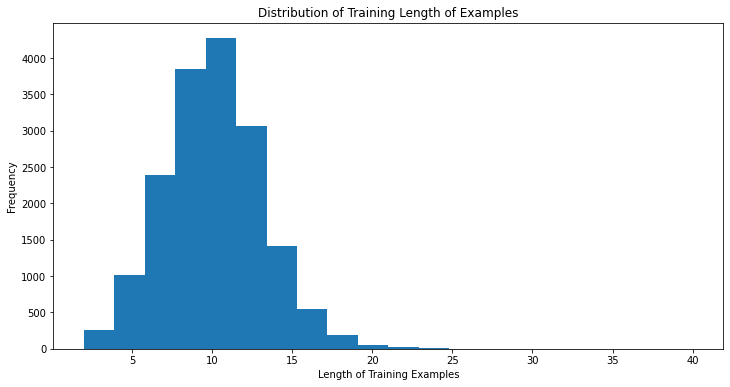

In [22]:
#Distribution of Length of Training Examples
plt.figure(figsize=(12,6))
plt.title('Distribution of Training Length of Examples')
plt.hist(train_length, 20)
plt.xlabel('Length of Training Examples')
plt.ylabel('Frequency')
plt.show()

Choosing a Length that covers 80% percent of the training examples - 80th Percentile

In [23]:
#80th Percentile of Length of Training Examples
print('80th Percentile:', np.percentile(train_length, 80))

80th Percentile: 13.0


In [24]:
#Padding
max_len = 13
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len, padding='pre', truncating='pre')
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=max_len, padding='pre', truncating='pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len, padding='pre', truncating='pre')

In [25]:
X_train.shape

(17093, 13)

In [26]:
X_val.shape

(4274, 13)

In [27]:
X_test.shape

(5342, 13)

In [28]:
#Few examples after Padding
num = np.random.randint(0, len(X_train))
X_train[num]

array([   1, 3280,    7, 1788,    2,  345,   53,   51,   56, 1412,    5,
        549, 4210], dtype=int32)

**Glove Embedding for the Words**

In [29]:
#Downloading Glove Model
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-05-25 16:13:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-25 16:13:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-25 16:13:18--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [30]:
#Check if embeddings have been downloaded
!ls -1

gdrive
glove.6B.zip
sample_data


In [31]:
#Unzip the file
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


**Let's consider Embedding Size = 50**

In [32]:
#Convert Glove Model to Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 50)

**400000 Words, Each Word is embedded by 50 numbers.**

In [33]:
!ls -1

gdrive
glove.6B.100d.txt
glove.6B.200d.txt
glove.6B.300d.txt
glove.6B.50d.txt
glove.6B.50d.txt.word2vec
glove.6B.zip
sample_data


In [34]:
#Getting the Embeddings for words in our sequence
from gensim.models import Word2Vec, KeyedVectors
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [35]:
#Embeddings Size
embedding_size = 50

In [36]:
#Embedding matrix to store embeddings for words in our sequence
embedding_matrix = np.zeros((10000 + 1, embedding_size))
embedding_matrix.shape

(10001, 50)

In [37]:
#Embedding Matrix
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
#Getting the embeddings for our words in the sequence using Glove pre-trained model
for word, i in sorted(t1.word_index.items(),key=lambda x:x[1]):
    if i > (10000 + 1):
        break
    try:
        embedding_vector = glove_model[word] 
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [39]:
#Embedding Matrix
embedding_matrix[5]

array([ 0.33041999,  0.24995001, -0.60873997,  0.10923   ,  0.036372  ,
        0.15099999, -0.55083001, -0.074239  , -0.092307  , -0.32821   ,
        0.09598   , -0.82269001, -0.36717001, -0.67009002,  0.42908999,
        0.016496  , -0.23573001,  0.12864   , -1.09529996,  0.43334001,
        0.57067001, -0.1036    ,  0.20422   ,  0.078308  , -0.42794999,
       -1.79840004, -0.27864999,  0.11954   , -0.12689   ,  0.031744  ,
        3.86310005, -0.17786001, -0.082434  , -0.62698001,  0.26497   ,
       -0.057185  , -0.073521  ,  0.46103001,  0.30862001,  0.12498   ,
       -0.48609   , -0.0080272 ,  0.031184  , -0.36576   , -0.42699   ,
        0.42164001, -0.11666   , -0.50703001, -0.027273  , -0.53285003])

**Sarcasm Detection Model**

In [ ]:
#Model Architecture

#Clear any previous model from memory
tf.keras.backend.clear_session()

#Model Initialization
model = tf.keras.Sequential()

#Embedding Layer
model.add(tf.keras.layers.Embedding(10000 + 1, embedding_size, weights=[embedding_matrix], trainable=False, input_length=max_len))

#LSTM Layer
model.add(tf.keras.layers.LSTM(100))

#Dense Layer as Output Layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Optimizer and Loss Function Definition
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 50)            500050    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 560,551
Trainable params: 60,501
Non-trainable params: 500,050
_________________________________________________________________


**Model Training**

In [ ]:
#Train the Model
history = model.fit(X_train, y_train, epochs=12, batch_size=800, validation_data=(X_val, y_val))

Epoch 1/12
22/22 [==============================] - 6s 173ms/step - loss: 0.6680 - accuracy: 0.5916 - val_loss: 0.6128 - val_accuracy: 0.6720
Epoch 2/12
22/22 [==============================] - 3s 136ms/step - loss: 0.5942 - accuracy: 0.6850 - val_loss: 0.5716 - val_accuracy: 0.7087
Epoch 3/12
22/22 [==============================] - 3s 133ms/step - loss: 0.5585 - accuracy: 0.7176 - val_loss: 0.5380 - val_accuracy: 0.7349
Epoch 4/12
22/22 [==============================] - 3s 132ms/step - loss: 0.5339 - accuracy: 0.7393 - val_loss: 0.5155 - val_accuracy: 0.7511
Epoch 5/12
22/22 [==============================] - 3s 132ms/step - loss: 0.5045 - accuracy: 0.7599 - val_loss: 0.4864 - val_accuracy: 0.7677
Epoch 6/12
22/22 [==============================] - 3s 133ms/step - loss: 0.4706 - accuracy: 0.7777 - val_loss: 0.4647 - val_accuracy: 0.7817
Epoch 7/12
22/22 [==============================] - 3s 133ms/step - loss: 0.4386 - accuracy: 0.8002 - val_loss: 0.4492 - val_accuracy: 0.7899
Epoch 

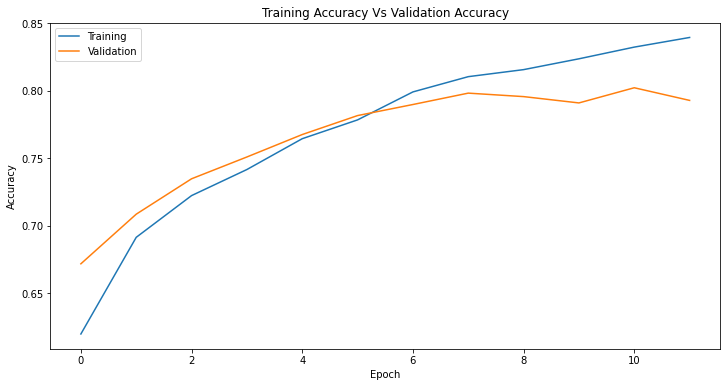

In [ ]:
#Plot between Training Accuracy and Validation Accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy Vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

**Save the Model:**

In [ ]:
#Save Model
model.save('model_lstm.h5')

In [ ]:
!ls -1

gdrive
glove.6B.100d.txt
glove.6B.200d.txt
glove.6B.300d.txt
glove.6B.50d.txt
glove.6B.50d.txt.word2vec
glove.6B.zip
model_lstm.h5
sample_data


**Load the Model for Prediction on Test Data:**

In [ ]:
#Load Model
model = tf.keras.models.load_model('model_lstm.h5')

In [ ]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 50)            500050    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 560,551
Trainable params: 60,501
Non-trainable params: 500,050
_________________________________________________________________


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
#Prediction on Test Data
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 79.71%


**Bi-Directional LSTM:**

In [45]:
#Model Architecture

#Clear any previous model from memory
tf.keras.backend.clear_session()

#Model Initialization
model1 = tf.keras.Sequential()

#Embedding Layer
model1.add(tf.keras.layers.Embedding(10000 + 1, embedding_size, weights=[embedding_matrix], trainable=False, input_length=max_len))

#LSTM Layer
model1.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), merge_mode='concat'))

#Dense Layer as Output Layer
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [46]:
#Optimizer and Loss Function Definition
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
#Model Summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 50)            500050    
_________________________________________________________________
bidirectional (Bidirectional (None, 13, 200)           120800    
_________________________________________________________________
dense (Dense)                (None, 13, 1)             201       
Total params: 621,051
Trainable params: 121,001
Non-trainable params: 500,050
_________________________________________________________________


**Bi-Directional Model Training:**

In [48]:
#Model Training
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=800, validation_data=(X_val, y_val))

Epoch 1/10
22/22 [==============================] - 10s 298ms/step - loss: 0.6806 - accuracy: 0.5515 - val_loss: 0.6349 - val_accuracy: 0.6416
Epoch 2/10
22/22 [==============================] - 6s 262ms/step - loss: 0.6192 - accuracy: 0.6598 - val_loss: 0.5897 - val_accuracy: 0.6896
Epoch 3/10
22/22 [==============================] - 6s 266ms/step - loss: 0.5866 - accuracy: 0.6921 - val_loss: 0.5660 - val_accuracy: 0.7091
Epoch 4/10
22/22 [==============================] - 6s 262ms/step - loss: 0.5524 - accuracy: 0.7239 - val_loss: 0.5380 - val_accuracy: 0.7288
Epoch 5/10
22/22 [==============================] - 6s 265ms/step - loss: 0.5185 - accuracy: 0.7529 - val_loss: 0.5121 - val_accuracy: 0.7462
Epoch 6/10
22/22 [==============================] - 6s 262ms/step - loss: 0.4947 - accuracy: 0.7656 - val_loss: 0.4874 - val_accuracy: 0.7629
Epoch 7/10
22/22 [==============================] - 6s 262ms/step - loss: 0.4634 - accuracy: 0.7827 - val_loss: 0.4693 - val_accuracy: 0.7732
Epoch

**Save the Model:**

In [49]:
#Save the Model
model1.save('model_bidirectional.h5')

In [50]:
!ls -1

gdrive
glove.6B.100d.txt
glove.6B.200d.txt
glove.6B.300d.txt
glove.6B.50d.txt
glove.6B.50d.txt.word2vec
glove.6B.zip
model_bidirectional.h5
sample_data


**Load the Model for Prediction on Test Data:**

In [51]:
#Load Model
model1 = tf.keras.models.load_model('model_bidirectional.h5')

In [52]:
#Model Summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 13, 50)            500050    
_________________________________________________________________
bidirectional (Bidirectional (None, 13, 200)           120800    
_________________________________________________________________
dense (Dense)                (None, 13, 1)             201       
Total params: 621,051
Trainable params: 121,001
Non-trainable params: 500,050
_________________________________________________________________


In [53]:
#Prediction on Test Data
score = model1.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

accuracy: 79.35%
